### **Cifar_10 trained on very simple CNN**

In [4]:
 %tensorflow_version 1.x
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Activation, \
Flatten, Conv3D, MaxPooling3D
from keras import regularizers
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

#loading data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#preparing data

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
y_train = np_utils.to_categorical(y_train, 10) # One-hot encode the labels
y_test = np_utils.to_categorical(y_test, 10)

#defining parameters

epochs=20
nb_classes=10
conv_1_depth=100
conv_2_depth=100
conv_3_depth=200
conv_4_depth=200
conv_5_depth=400
dense_1_depth=600
dense_2_depth=nb_classes
batch_size=32
learning_rate=0.0001


#defining simple CNN model

model = Sequential()

model.add(Conv2D(conv_1_depth, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(conv_2_depth, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(conv_3_depth, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))

model.add(Conv2D(conv_4_depth, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))

model.add(Conv2D(conv_5_depth, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(dense_1_depth,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(dense_2_depth))
model.add(Activation('softmax'))

#show model summary

model.summary()

optimizer = Adam(lr=learning_rate)

#compile model 

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.20,
          shuffle=True)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 100)       2800      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 100)       90100     
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 100)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 100)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 200)      

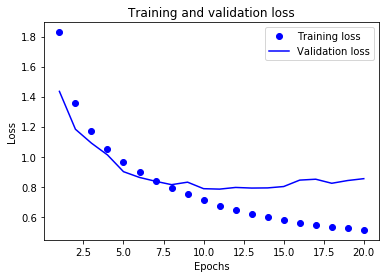

10000/10000 [==============================] - 5s 518us/step
[0.872084091091156, 0.8177]


In [5]:
#plot training and validation sets' losses

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#evaluate on the test set 
print(model.evaluate(x_test, y_test))